In [71]:
import pandas as pd
import nolds
import numpy as np
import math
from tqdm.notebook import tqdm
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind

In [15]:
class pain_rating:
    def __init__(self,PID):
        self.PID=PID
        self.D1_rating=[]
        self.D1_time=[]
        self.D2_rating=[]
        self.D2_time=[]
        self.D3_rating=[]
        self.D3_time=[]
        self.D4_rating=[]
        self.D4_time=[]
    def __str__(self):
        print("participant: "+self.PID)
        if self.D1_rating!=[]:
            print("visit 1",end=" ")
        if self.D2_rating!=[]:
            print("visit 2",end=" ")
        if self.D3_rating!=[]:
            print("visit 3",end=" ")
        if self.D4_rating!=[]:
            print("visit 4",end=" ")
        return "attended"
    def insert_rating_time_D1(self,rating_per_session,time_per_session):
        self.D1_rating.append(rating_per_session)
        self.D1_time.append(time_per_session)
    def insert_rating_time_D2(self,rating_per_session,time_per_session):
        self.D2_rating.append(rating_per_session)
        self.D2_time.append(time_per_session)
    def insert_rating_time_D3(self,rating_per_session,time_per_session):
        self.D3_rating.append(rating_per_session)
        self.D3_time.append(time_per_session)
    def insert_rating_time_D4(self,rating_per_session,time_per_session):
        self.D3_rating.append(rating_per_session)
        self.D3_time.append(time_per_session)

In [16]:
pain_rating_df=pd.read_pickle('../data/CBP_rating.pkl')

In [33]:
D1_rating=[]
D2_rating=[]
D3_rating=[]
D4_rating=[]
all_rating=[]
day_list=[]
for index,row in pain_rating_df.iterrows():
    if row.D1_rating!=[]:
        D1_rating.append(row.D1_rating)
        all_rating.append(row.D1_rating)
        day_list.append(1)
    if row.D2_rating!=[]:
        D2_rating.append(row.D2_rating)
        all_rating.append(row.D2_rating)
        day_list.append(2)
    if row.D3_rating!=[]:
        D3_rating.append(row.D3_rating)
        all_rating.append(row.D3_rating)
        day_list.append(3)
    if row.D4_rating!=[]:
        D4_rating.append(row.D4_rating)
        all_rating.append(row.D4_rating)
        day_list.append(4)

In [25]:
m=2
r=0.2
SampEn_m2_r02=[]
inf_count=0
zero_count=0
for rating in tqdm(all_rating):
    r_std=r*np.std(rating)
    en=nolds.sampen(rating, emb_dim=m, tolerance=r_std)
    if math.isinf(en):
        SampEn_m2_r02.append(-1)
        inf_count+=1
    else:
        SampEn_m2_r02.append(en)
        if en==0:
            zero_count+=1
print("valid entropy value: "+str(len(SampEn_m2_r02)))
print("infinity value: "+str(inf_count))
print("zero value: "+str(zero_count))

  0%|          | 0/332 [00:00<?, ?it/s]

valid entropy value: 332
infinity value: 0
zero value: 0


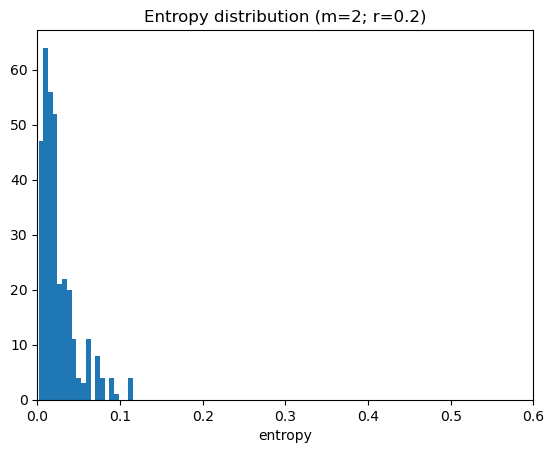

In [63]:
plt.xlabel("entropy")
plt.title("Entropy distribution (m=2; r=0.2)")
plt.hist(SampEn_m2_r02, bins=20)
plt.xlim(0,0.6)
plt.show()

In [64]:
print("mean:"+str(np.mean(SampEn_m2_r02)))
print("std:"+str(np.std(SampEn_m2_r02)))

mean:0.024794683650787092
std:0.02142379863588362


In [72]:
SampEn_m2_r02_carl=np.array(SampEn_m2_r02)
SharonEn_df=pd.read_pickle('../data/Sharon_m2r02_Sampen.pkl')
SampEn_m2_r02_Sharon=np.array(SharonEn_df['Sharon entropy'].tolist())
ttest_ind(SampEn_m2_r02_carl,SampEn_m2_r02_Sharon)

(-0.7096994499968238, 0.47817673017716367, 578.0)

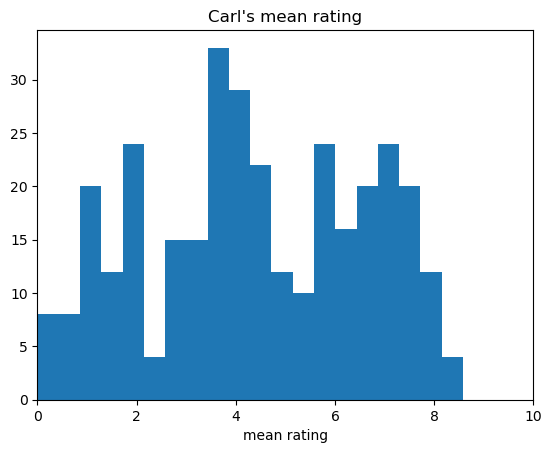

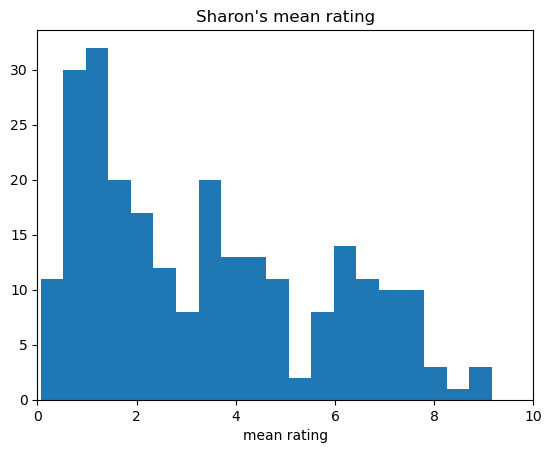

(5.338586116591626, 1.347115854955024e-07, 579.0)

In [80]:
mean_carl=[]
for rating in all_rating:
    mean_carl.append(np.mean(rating))
Sharonallrating_df=pd.read_pickle('../data/Sharon_allrating.pkl')
Sharonallrating=Sharonallrating_df['Sharon rating'].tolist()
mean_Sharon=[]
for rating in Sharonallrating:
    mean_Sharon.append(np.mean(rating))
mean_carl_np=np.array(mean_carl)/10
mean_carl=mean_carl_np.tolist()
plt.xlabel("mean rating")
plt.title("Carl's mean rating")
plt.hist(mean_carl, bins=20)
plt.xlim(0,10)
plt.show()
plt.xlabel("mean rating")
plt.title("Sharon's mean rating")
plt.hist(mean_Sharon, bins=20)
plt.xlim(0,10)
plt.show()
mean_rating_carl_np=np.array(mean_carl)
mean_rating_sharon_np=np.array(mean_Sharon)
ttest_ind(mean_rating_carl_np,mean_rating_sharon_np)

In [46]:
m=5
r=0.2
SampEn_m200_r02=[]
inf_count=0
zero_count=0
for rating in tqdm(all_rating):
    r_std=r*np.std(rating)
    en=nolds.sampen(rating, emb_dim=m, tolerance=r_std)
    if math.isinf(en):
        SampEn_m200_r02.append(-1)
        inf_count+=1
    else:
        SampEn_m200_r02.append(en)
        if en==0:
            zero_count+=1
print("valid entropy value: "+str(len(SampEn_m2_r02)))
print("infinity value: "+str(inf_count))
print("zero value: "+str(zero_count))

  0%|          | 0/332 [00:00<?, ?it/s]

valid entropy value: 332
infinity value: 0
zero value: 0


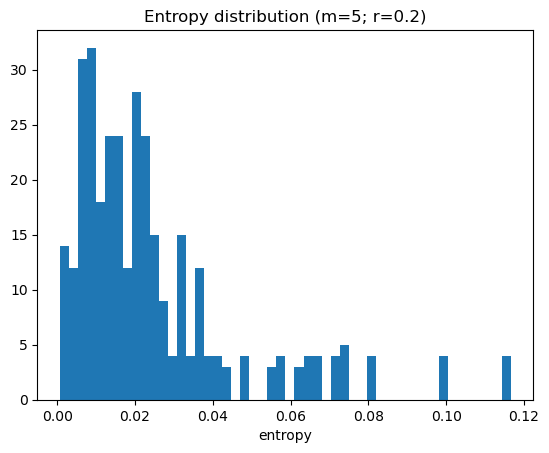

In [60]:
plt.xlabel("entropy")
plt.title("Entropy distribution (m=5; r=0.2)")
plt.hist(SampEn_m200_r02, bins=50)
plt.show()

In [87]:
def datadiv(data,div):
    data_np=np.array(data)/div
    data=data_np.tolist()
    return data

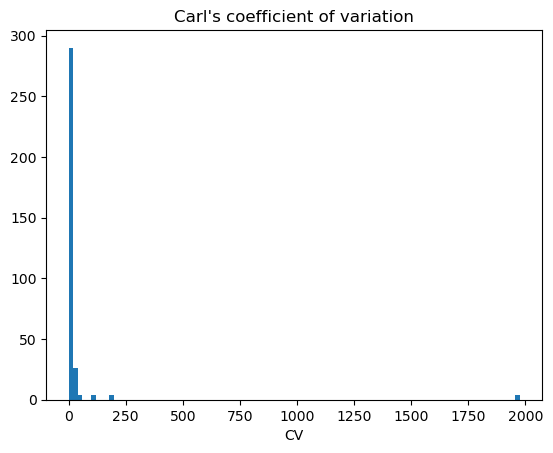

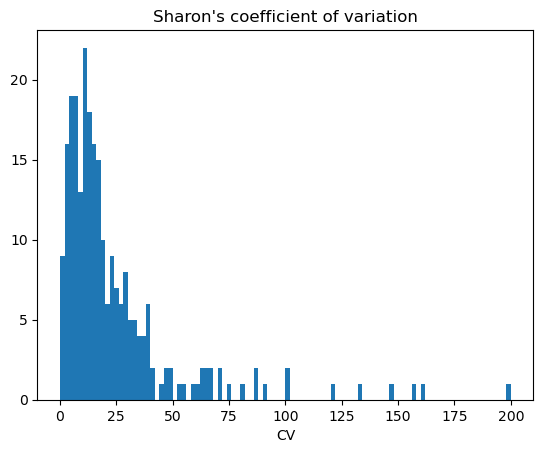

(5.338586116591626, 1.347115854955024e-07, 579.0)

In [90]:
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
cv_Sharon=[]
cv_Carl=[]
for rating in Sharonallrating:
    cv_Sharon.append(cv(rating))
for rating in all_rating:
    rating=datadiv(rating,10)
    cv_Carl.append(cv(rating))
plt.xlabel("CV")
plt.title("Carl's coefficient of variation")
plt.hist(cv_Carl, bins=100)
# plt.xlim(0,10)
plt.show()
plt.xlabel("CV")
plt.title("Sharon's coefficient of variation")
plt.hist(cv_Sharon, bins=100)
# plt.xlim(0,10)
plt.show()
mean_rating_carl_np=np.array(mean_carl)
mean_rating_sharon_np=np.array(mean_Sharon)
ttest_ind(mean_rating_carl_np,mean_rating_sharon_np)

In [85]:
a=[10,12,15,20,40]
a_np=np.array(a)/10
a=a_np.tolist()
a

[1.0, 1.2, 1.5, 2.0, 4.0]